In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('./quikr_car.csv')
df.head()

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000",Diesel


In [4]:
df.dtypes

Name of car     object
Company name    object
Year            object
Price           object
Kms driven      object
Fuel_type       object
dtype: object

### Initial data cleaning and processing

##### Getting rid of bad data

In [5]:
bad=['i','2012','well','all','7','9','scratch','urgent','sell','any','very','sale','used','selling','URJENT','Commercial','Used','Sale','Any','Well','I'] 
for i in df['Company name']:
    if i in bad:
        df = df.drop(df[df['Company name'] ==i].index)

In [125]:
bad_years= ['/-Rs','2 bs','150k','EV2','Eon','Sale','TOUR','ara)','cab','car','cent','d...','digo','e...','emi','o...','odel','r 15','sale','t xe','zest','tion','SALE','2bs']
for i in df['Year']:
    if i in bad_years:
        df=df.drop(df[df['Year']==i].index)

In [6]:
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].str.replace('Ask For Price','0')
df['Price']=pd.to_numeric(df['Price'])

In [7]:
df['Kms driven']=df['Kms driven'].str.replace(',','')
df['Kms driven']=df['Kms driven'].str.replace('kms','')
df['Kms driven']=df['Kms driven'].str.replace('Petrol','0')
df['Kms driven']=pd.to_numeric(df['Kms driven'])

In [8]:
df['Company name']=df['Company name'].str.replace('tata','Tata')
df['Company name']=df['Company name'].str.replace('TATA','Tata')
df['Company name']=df['Company name'].str.replace('Tara','Tata')
df['Company name']=df['Company name'].str.replace('MARUTI','Maruti')
df['Company name']=df['Company name'].str.replace('Swift','Maruti')

In [9]:
companyList=df.groupby('Company name')['Name of car'].count()

In [163]:
companyList.keys()

Index(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land', 'Mahindra',
       'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo', 'Yamaha'],
      dtype='object', name='Company name')

## Exploratory Data Analysis

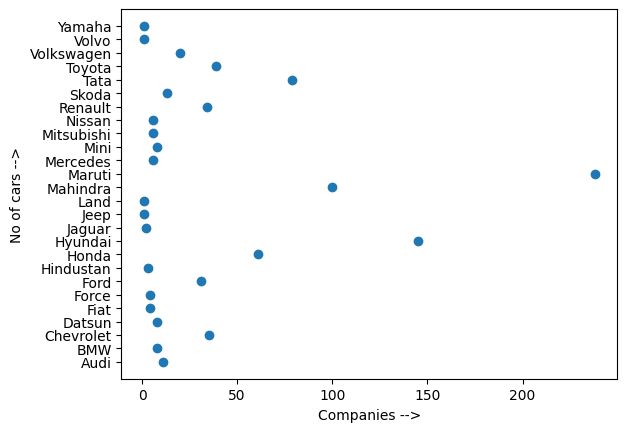

In [164]:
plt.scatter(companyList.values,companyList.keys())
plt.xlabel('Companies -->')
plt.ylabel('No of cars -->')
plt.show()

### Market composition

In [165]:
explode=[]
for i in range(0,len(companyList)):
    explode.append(0.35)

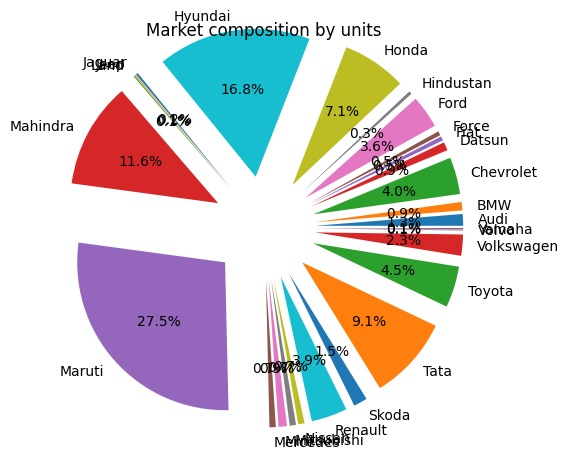

In [13]:
plt.pie(companyList.values,labels=companyList.keys(),explode=explode,autopct='%1.1f%%')
plt.title('Market composition by units')
plt.show()

##### Market composition by total price

In [14]:
price_explode = [i * 2 for i in explode]

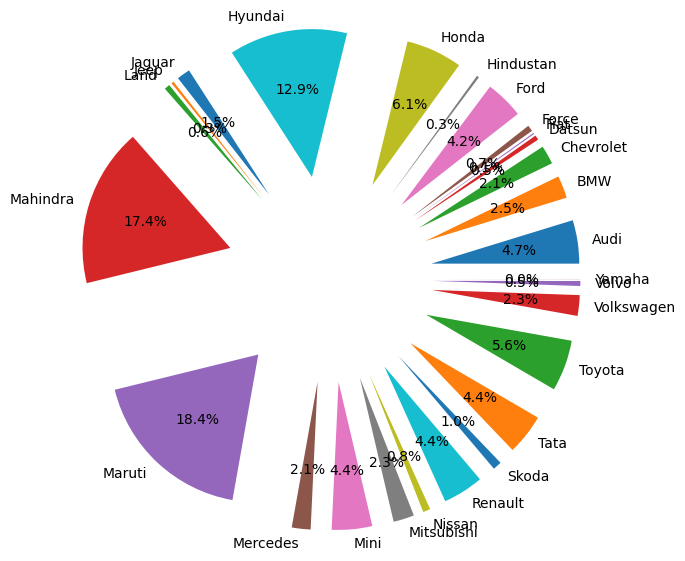

In [15]:
grouped = df.groupby('Company name')['Price'].sum()
plt.pie(grouped.values,labels=grouped.keys(),explode=price_explode,autopct='%1.1f%%')
# plt.title('Market composition by total price')
plt.show()

In [16]:
fuelType= df.groupby('Fuel_type')['Year'].count()
fuelType

Fuel_type
Diesel    395
LPG         2
Petrol    440
Name: Year, dtype: int64

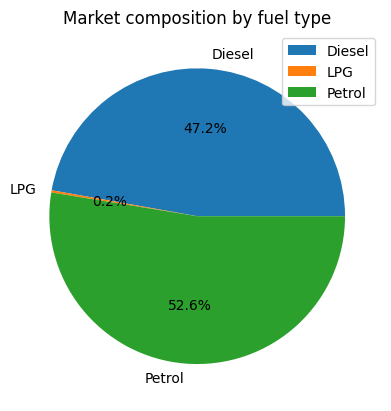

In [17]:
plt.pie(fuelType.values,labels=fuelType.keys(),autopct='%1.1f%%')
plt.title('Market composition by fuel type')
plt.legend()
plt.show()

In [126]:
years=df.groupby('Year')['Company name'].count()
year_keys_array=np.array(years.keys().unique())
year_keys_array=str(year_keys_array)

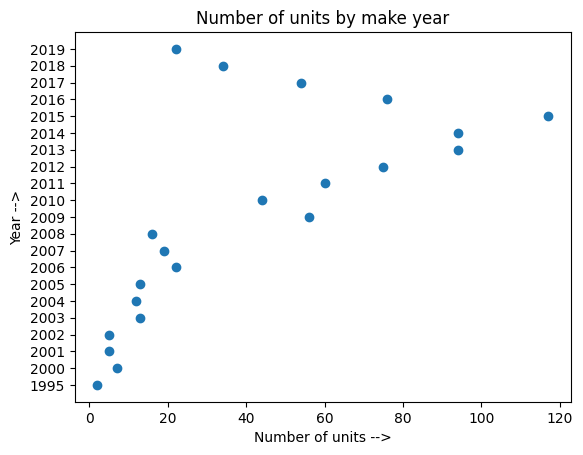

In [129]:
plt.scatter(years.values,years.keys())
plt.title('Number of units by make year')
plt.xlabel('Number of units -->')
plt.ylabel('Year -->')
plt.show()

In [166]:
mean_scatter_data=df.groupby('Company name')['Price'].mean()
median_scatter_data=df.groupby('Company name')['Price'].median()

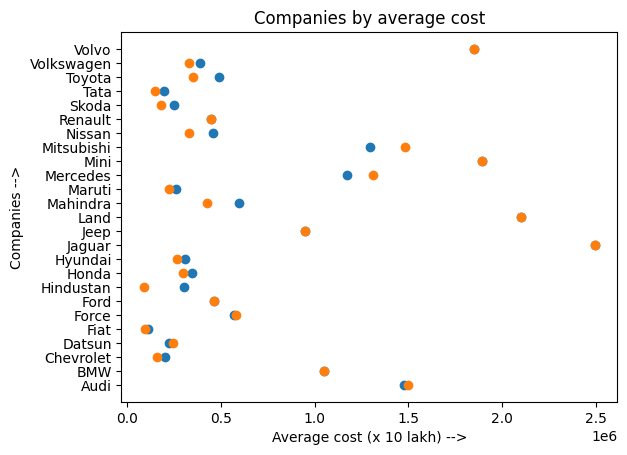

In [167]:
plt.scatter(mean_scatter_data.values,mean_scatter_data.keys())
plt.scatter(median_scatter_data,median_scatter_data.keys())
plt.title('Companies by average cost')
plt.xlabel('Average cost (x 10 lakh) -->')
plt.ylabel('Companies -->')
plt.show()

In [177]:
for i in mean_scatter_data.keys():
    if mean_scatter_data[i]==max(mean_scatter_data):
        print('Most expensive car brand: ', i,'| Average price: ₹{:,.2f}'.format(mean_scatter_data[i]))
    if mean_scatter_data[i]==min(mean_scatter_data):
        print('Least expensive car brand: ',i,'| Average price: ₹{:,.2f}'.format(mean_scatter_data[i]))

Least expensive car brand:  Fiat | Average price: ₹109,875.00
Most expensive car brand:  Jaguar | Average price: ₹2,495,000.00
